<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220505.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표 
* pd functions
* np
* regression
* json

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, date, time, timezone, timedelta

# pd functions

In [2]:
list_file = [f'players_{a:02}.csv' for a in range(15, 20)]
d1 = pd.concat(map(pd.read_csv, list_file))
d1.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


In [5]:
top_nans = pd.DataFrame(d1.isnull().sum()[d1.isnull().sum() != 0], columns = ['nans']).nlargest(3, 'nans')
top_nans

,nans
loaned_from,80017
nation_position,79983
nation_jersey_number,79983


In [8]:
d1[top_nans.index].fillna(d1.mode().iloc[0, 0]).head()

,loaned_from,nation_position,nation_jersey_number
0,41.0,CF,10.0
1,41.0,LW,7.0
2,41.0,RS,11.0
3,41.0,ST,10.0
4,41.0,GK,1.0


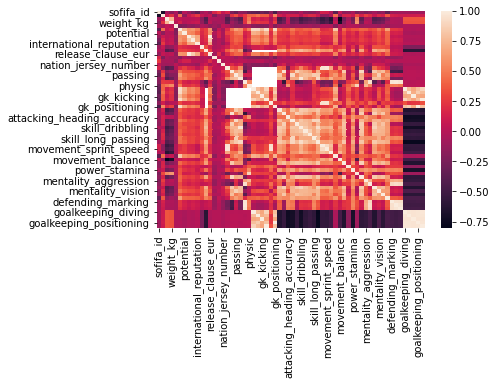

In [9]:
sns.heatmap(d1.corr())

In [15]:
d2 = pd.read_csv('pivot.csv', parse_dates = ['month'], dtype = {'state':'category'})
d2.head()

,month,state,permit
0,2020-04-30,Alabama,21276.0
1,2020-04-30,Alaska,85.0
2,2020-04-30,California,24460.0
3,2020-04-30,Massachusetts,5074.0
4,2020-04-30,North Dakota,280.0


In [18]:
s1 = pd.pivot_table(d2, index = 'state', columns = 'month', values = 'permit')
s1

month,2020-01-31,2020-02-29,2020-03-31,2020-04-30
state,,,,
Alabama,37140.0,29633.0,31205.0,21276.0
Alaska,223.0,139.0,143.0,85.0
California,34694.0,32002.0,27792.0,24460.0
Massachusetts,9289.0,9173.0,NaN,5074.0
North Dakota,370.0,396.0,587.0,280.0


In [21]:
s1.columns = s1.columns.astype('str')
s1 = s1.reset_index()
s1

month,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [22]:
s1.columns.name = None
s1

,state,2020-01-31,2020-02-29,2020-03-31,2020-04-30
0,Alabama,37140.0,29633.0,31205.0,21276.0
1,Alaska,223.0,139.0,143.0,85.0
2,California,34694.0,32002.0,27792.0,24460.0
3,Massachusetts,9289.0,9173.0,NaN,5074.0
4,North Dakota,370.0,396.0,587.0,280.0


In [24]:
s2 = pd.melt(s1, id_vars = 'state', var_name = 'month', value_name = 'permit')
s2[d2.columns].head()

,month,state,permit
0,2020-01-31,Alabama,37140.0
1,2020-01-31,Alaska,223.0
2,2020-01-31,California,34694.0
3,2020-01-31,Massachusetts,9289.0
4,2020-01-31,North Dakota,370.0


# np

In [25]:
d3  = pd.DataFrame({'user_id' : range(1, 7), 
                    'purchase_date' : ["2015-01-23 14:05:21", "2015-02-05 05:07:30", 
                                       "2015-02-18 17:08:51", "2015-03-21 17:07:30", 
                                       "2015-03-11 18:32:56", "2015-03-03 11:02:30"]})

d3.purchase_date = pd.to_datetime(d3.purchase_date)
d3

,user_id,purchase_date
0,1,2015-01-23 14:05:21
1,2,2015-02-05 05:07:30
2,3,2015-02-18 17:08:51
3,4,2015-03-21 17:07:30
4,5,2015-03-11 18:32:56
5,6,2015-03-03 11:02:30


In [35]:
d3.assign(month1 = d3.purchase_date.to_numpy().astype('datetime64[M]'),
          month2 = d3.purchase_date.dt.to_period('M').dt.to_timestamp(),
          month3 = d3.purchase_date.dt.floor('D') - pd.offsets.MonthBegin(1),
          month4 = d3.purchase_date.apply(lambda x : x.strftime('%Y-01-01'))
          ).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        6 non-null      int64         
 1   purchase_date  6 non-null      datetime64[ns]
 2   month1         6 non-null      datetime64[ns]
 3   month2         6 non-null      datetime64[ns]
 4   month3         6 non-null      datetime64[ns]
 5   month4         6 non-null      object        
dtypes: datetime64[ns](4), int64(1), object(1)
memory usage: 416.0+ bytes


In [36]:
x = np.random.randint(1, 101, 200)
cond = [x >= 90, x >= 50, x >=0]
labs = list('ABC')
pd.DataFrame({'score' : x, 'grade' : np.select(cond, labs)}).head()

,score,grade
0,82,B
1,68,B
2,17,C
3,60,B
4,97,A


# regression

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import sklearn.datasets as skd
import matplotlib.pyplot as plt

In [38]:
a1 = pd.read_csv('heights.csv')
a2 = pd.read_csv('manhattan.csv')

In [39]:
x = a1.height.values.reshape(-1, 1)
y = a1.weight

In [40]:
fit_lm = LinearRegression().fit(x, y)

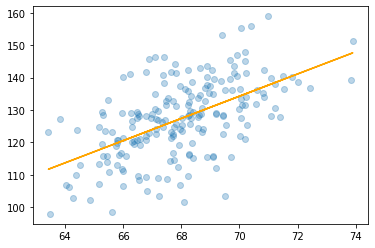

In [41]:
plt.plot(x, y, 'o', alpha = .3)
plt.plot(x, fit_lm.predict(x), color = 'orange')

In [43]:
a2.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [44]:
a2.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [45]:
x = a2[['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym']]
y = a2['rent']

In [46]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [48]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)

In [49]:
pred_lm = fit_lm.predict(x_te)
pred_rf = fit_lm.predict(x_te)

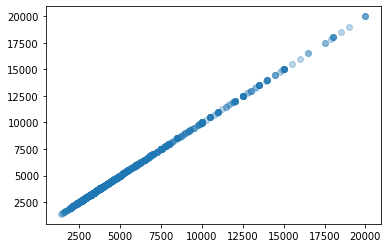

In [52]:
plt.plot(y_te, pred_rf, 'o', alpha = .3)

In [58]:
fit_lm.score(x_te,y_te), fit_rf.score(x_te,y_te)

(1.0, 0.9999851977883323)

In [60]:
raw = skd.load_diabetes()

In [61]:
[a for a, v in raw.items()]

['data',
 'target',
 'frame',
 'DESCR',
 'feature_names',
 'data_filename',
 'target_filename',
 'data_module']

In [63]:
x = pd.DataFrame(raw['data'], columns = raw['feature_names'])
y = raw['target']
x.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [64]:
x_tr, x_te, y_tr, y_te = train_test_split(x, y, train_size = .7)

In [69]:
fit_lm = LinearRegression().fit(x_tr, y_tr)
pred_lm = fit_lm.predict(x_te)
fit_rf = RandomForestRegressor().fit(x_tr, y_tr)
pred_rf = fit_rf.predict(x_te)

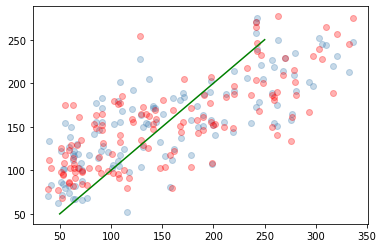

In [73]:
plt.plot(y_te, pred_lm, 'o', color = 'steelblue',alpha = .3)
plt.plot(y_te, pred_rf, 'o', color = 'red', alpha = .3)
plt.plot([50,250], [50,250], color = 'green')

In [75]:
fit_lm.score(x_te, y_te), fit_rf.score(x_te, y_te)

(0.5600852863691252, 0.5399503939226935)

# json

In [86]:
import json
import os

In [77]:
data = {}
data['posts'] = []

In [80]:
data['posts'].append({
    'title' : '응\?',
    'url' : 'http://wow.com',
    'draft' : 'false'
})

In [81]:
data

{'posts': [{'draft': 'false', 'title': '응\\?', 'url': 'http://wow.com'}]}

In [82]:
data['posts'].append({
    'title' : '헤헤...',
    'url' : 'http://whereistheworld.com',
    'draft' : 'false'
})
data

{'posts': [{'draft': 'false', 'title': '응\\?', 'url': 'http://wow.com'},
  {'draft': 'false', 'title': '헤헤...', 'url': 'http://whereistheworld.com'}]}

In [88]:
os.chdir('../content')

In [89]:
os.listdir()

['.config',
 'manhattan.csv',
 'players_17.csv',
 'players_19.csv',
 'test.json',
 'pivot.csv',
 'players_18.csv',
 'loan.csv',
 'img.jpg',
 'players_16.csv',
 'players_15.csv',
 'heights.csv',
 'sample_data']

In [91]:
with open('test.json', 'w') as o : 
  json.dump(data, o, indent = 4)

In [98]:
with open('test.json', 'r') as r :
  j = json.load(r)
  print(j)

{'posts': [{'title': '응\\?', 'url': 'http://wow.com', 'draft': 'false'}, {'title': '헤헤...', 'url': 'http://whereistheworld.com', 'draft': 'false'}]}


In [100]:
with open('test.json', 'r') as r :
  j = json.load(r)

j['posts'].append({
    'title' : '^0^v',
    'url' : 'http://google.com',
    'draft' : 'true'
})
j

{'posts': [{'draft': 'false', 'title': '응\\?', 'url': 'http://wow.com'},
  {'draft': 'false', 'title': '헤헤...', 'url': 'http://whereistheworld.com'},
  {'draft': 'true', 'title': '^0^v', 'url': 'http://google.com'}]}

In [101]:
with open('test.json', 'w') as w :
  json.dump(j, w, indent = 4)

In [103]:
pd.json_normalize(j['posts'])

,title,url,draft
0,응\?,http://wow.com,false
1,헤헤...,http://whereistheworld.com,false
2,^0^v,http://google.com,true
